In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
 
import numpy as np
import warnings
warnings.filterwarnings("ignore")




df = pd.read_csv("~/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df = df.drop(['customerID'], axis=1)
#customer id would not affect churn probability
df.info()
#no missing df found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


No     5174
Yes    1869
Name: Churn, dtype: int64




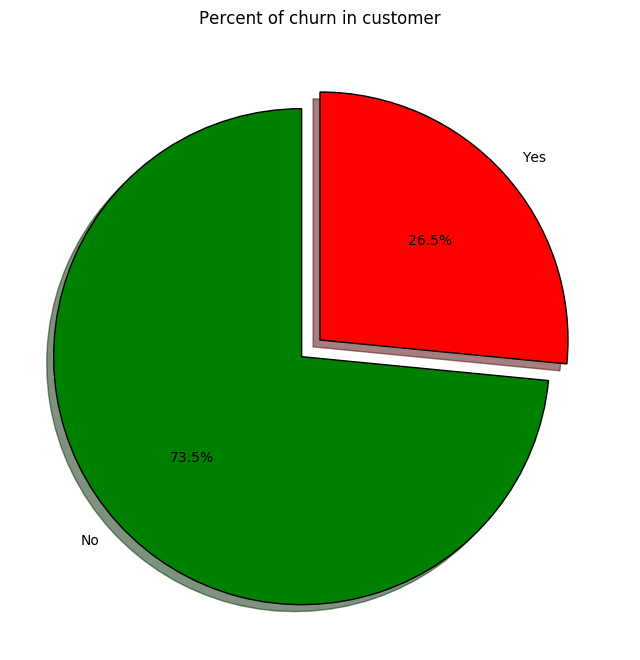

In [5]:
from pylab import rcParams


%matplotlib inline


print(df['Churn'].value_counts(normalize=False))
print('\n')

labels =df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)


colors = ["green","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Percent of churn in customer')
plt.show()




In [6]:

df['Partner'] = df['Partner'].apply(lambda x: 1 if x=='Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda s :1  if s =='Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda s :1  if s =='Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda s :1  if s =='Yes' else 0)
df['Churn'] = df['Churn'].apply(lambda s :1  if s =='Yes' else 0)




df['Has_InternetService'] = df['InternetService'].apply(lambda s :0  if s =='No' else 1)
df['Fiber_optic'] = df['InternetService'].apply(lambda s :1  if s =='Fiber optic' else 0)
df['DSL'] = df['InternetService'].apply(lambda s :1  if s =='DSL' else 0)

df.drop(['InternetService'], axis=1, inplace=True)

df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda s :1  if s =='Yes' else 0)
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda s :1  if s =='Yes' else 0)
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda s :1  if s =='Yes' else 0)
df['TechSupport'] = df['TechSupport'].apply(lambda s :1  if s =='Yes' else 0)
df['StreamingTV'] = df['StreamingTV'].apply(lambda s :1  if s =='Yes' else 0)
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda s :1  if s =='Yes' else 0)







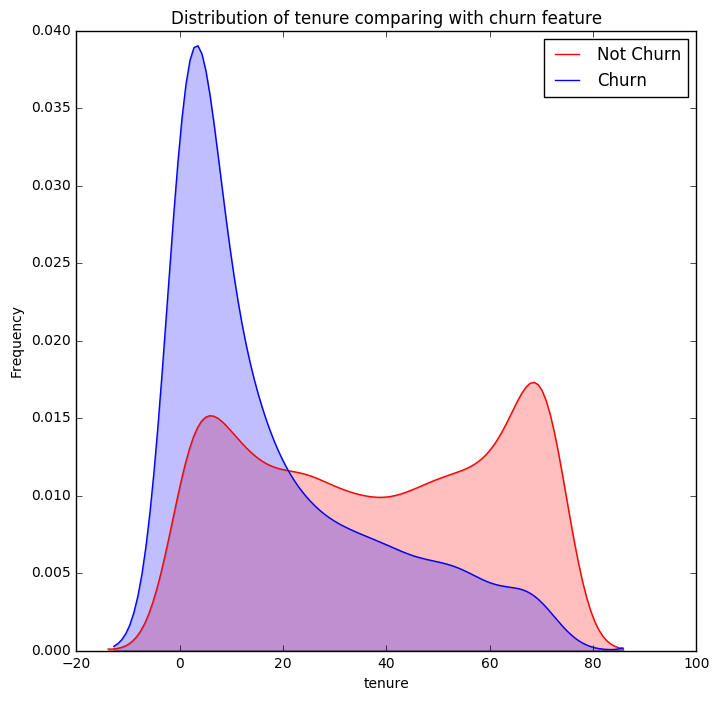

In [7]:
import seaborn as sns



















g = sns.kdeplot(df.tenure[(df["Churn"] == 0) ], color="Red", shade = True )
g = sns.kdeplot(df.tenure[(df["Churn"] == 1) ], ax =g, color="Blue", shade= True )
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

In [8]:
#As the tenure inceases, the chances of "churning" decrease as expected

In [9]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
df = pd.get_dummies(data=df, columns=['PaymentMethod'])

In [11]:
df[['PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check',
      'PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)']].head()


,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [12]:
df['Contract'].value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [13]:
df = pd.get_dummies(data=df, columns=['Contract'])

In [14]:
#missing  values in total charges
#need to drop null values 
#total charges is of object type

len(df[df['TotalCharges'] == " "])

## Drop missing df
df = df[df['TotalCharges'] != " "]

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


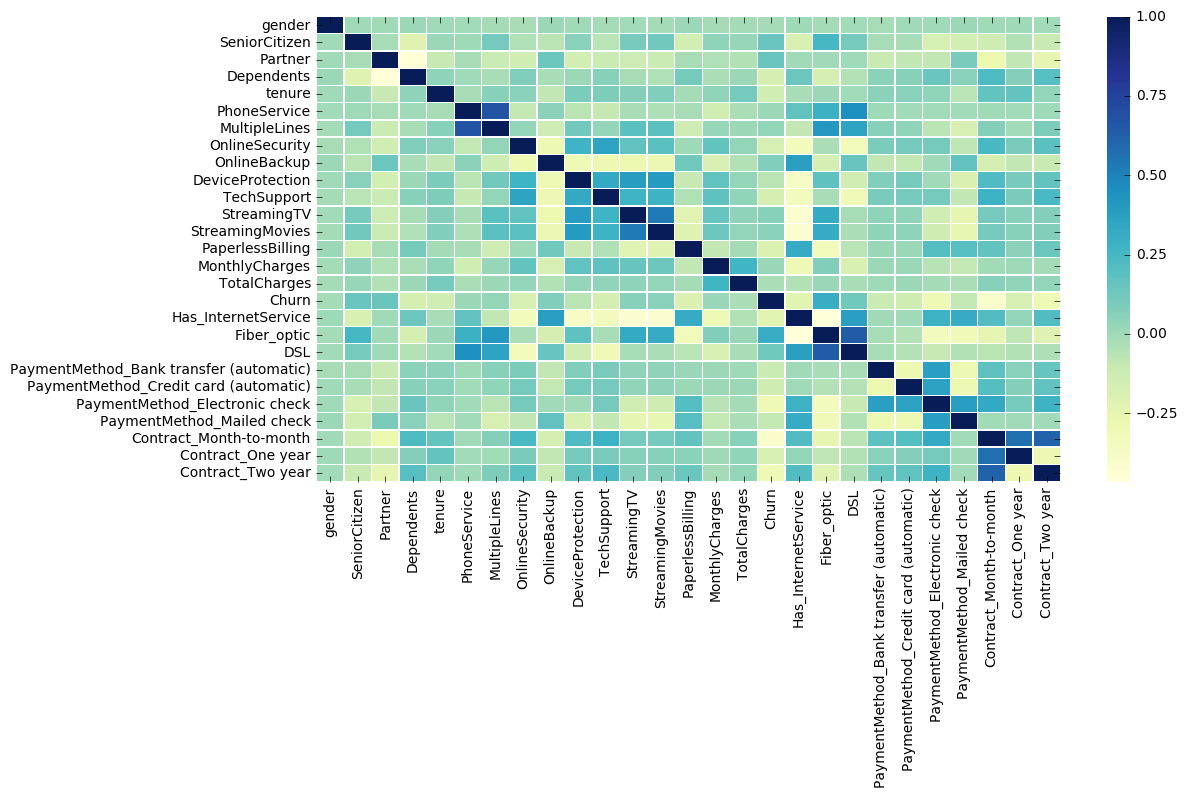

In [15]:
#Heatmap -Correlation of all features

plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split




In [17]:
correlation_matrix  = df.corr()
correlation_matrix["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
Fiber_optic                                0.307463
PaymentMethod_Electronic check             0.301455
Has_InternetService                        0.227578
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
PhoneService                               0.011691
DeviceProtection                          -0.066193
OnlineBackup                              -0.082307
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
DSL                                       -0.124141
PaymentMethod_Credit card (automatic)     -0.134687
Partner                                   -0.149982
Dependents                                -0.163128
TechSupport 

In [18]:

target_variable = 'Churn'

features = [
   'Churn'  ,                                   
'Contract_Month-to-month',                    
'Fiber_optic',                   
'PaymentMethod_Electronic check'  ,        
'Has_InternetService' ,          
    'MonthlyCharges'                ,             
'PaperlessBilling'                   ,        
'SeniorCitizen'                      ,      
'StreamingTV'                          ,      
'StreamingMovies'                       ,    
                        
'PhoneService'                            ,   
                             
                               
            
                          
'DeviceProtection'                         ,
'OnlineBackup'                              ,
'PaymentMethod_Mailed check'                ,
'PaymentMethod_Bank transfer (automatic)'   ,
'DSL'                                       ,
'PaymentMethod_Credit card (automatic)'     ,
'Partner'                                  ,
'Dependents'                               ,
'TechSupport'                               ,
'OnlineSecurity'                            ,
'Contract_One year'                         ,
'TotalCharges'                              ,
'Contract_Two year'                      ,
'tenure'     
            
            
            
            
            
            
            ]



In [ ]:
def evaluate_models(df, features):
    """
    Evaluate different models on the passed dataframe using the given features.
    """
    SEED=1
    
    # Create testing and training data
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_variable], test_size=0.2, random_state=SEED)

    results = {} # to store the results of the models
    models = [
        ('lr', LogisticRegression(random_state=SEED)),
        ('lda', LinearDiscriminantAnalysis()),
        ('svm', SVC(random_state=SEED)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('nb', GaussianNB()),
        ('dt', DecisionTreeClassifier(random_state=SEED)),
        ('rf', RandomForestClassifier(random_state=SEED, n_estimators=100)),
        ('et', ExtraTreesClassifier(random_state=SEED, n_estimators=100)),
        ('gb', GradientBoostingClassifier(random_state=SEED, n_estimators=100)),
        ('ada', AdaBoostClassifier(random_state=SEED))
        
        
    ]

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results[model_name] = (model, accuracy, f1, cm)
        
    sorted_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
    for model_name, (model, accuracy, f1, cm) in sorted_results:
        print(model_name, accuracy, f1)
        
    return results

In [ ]:


results = evaluate_models(df, features)

